In [3]:
import os
import numpy as np

def extract_nad_variation(path):
    postprocess_part = path.split("/postprocess/")[1]
    nad_variation = postprocess_part.split("/")[0]
    parts = nad_variation.split('_')[2]
    if len(parts) == 1:
        return f"{parts} chains"
    elif len(parts) > 1:
        return f"{', '.join(list(parts[:-1]))} and {parts[-1]} chains"
    return nad_variation

# Mock PTM_TYPES mapping
PTM_TYPES = {
    "0000": "reduction",
    # Add all mappings as before
}

# Initialize data storage with actual paths
rmsf_data = {base_path: [] for base_path in [
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e"
]}

# Create dictionary for storing separation data
separation_data = {}

# Collect data
for base_path in rmsf_data:
    separation_data[base_path] = {}  # Initialize for each base path
    for i in range(16):  # from 0000 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsf', f'{i:04d}_rmsf.xvg')
        if os.path.exists(file_path):
            with open(file_path, "r") as fh:
                rmsf = fh.readlines()

            if len(rmsf) > 18:  # Check to ensure there's data beyond header lines
                rmsf = rmsf[18:]  # Remove irrelevant headers
                rmsf_value = [float(line.split()[1]) for line in rmsf]
                chain_index = [int(line.split()[0]) for line in rmsf]

                # Identify start and end
                start = [i for i, e in enumerate(chain_index) if e == 1]
                end = [start[i+1] for i in range(len(start) - 1)] + [len(chain_index)]
                protein_and_chain = [  # Define your mapping here
                    # "GAP 1A", "PRK 1B", etc.
                ]
                label = f"{i:04d}"
                rmsf_data[base_path].append((label, rmsf_value, start, end, protein_and_chain))

                # Debug printing
                print(f"Processed: {file_path}")
                print(f"Label: {label}, Starts: {start}, Ends: {end}")

                # Store

Processed: /anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e/0000/rmsf/0000_rmsf.xvg
Label: 0000, Starts: [336, 655, 730, 1067, 1404, 1741, 2060, 2135, 2472, 2791, 3128, 3447, 3522, 3859, 4196], Ends: [655, 730, 1067, 1404, 1741, 2060, 2135, 2472, 2791, 3128, 3447, 3522, 3859, 4196, 4271]
Processed: /anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e/0001/rmsf/0001_rmsf.xvg
Label: 0001, Starts: [335, 654, 729, 1065, 1401, 1737, 2056, 2131, 2467, 2786, 3122, 3441, 3516, 3852, 4188], Ends: [654, 729, 1065, 1401, 1737, 2056, 2131, 2467, 2786, 3122, 3441, 3516, 3852, 4188, 4263]
Processed: /anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e/0002/rmsf/0002_rmsf.xvg
Label: 0002, Starts: [335, 654, 729, 1065, 1401, 1737, 2056, 2131, 2467, 2786, 3122, 3441, 3516, 3852, 4188], Ends: [654, 729, 1065, 1401, 1737, 2056, 2131, 2467, 2786, 3122, 3441, 3516, 3852, 4188, 4263]
P

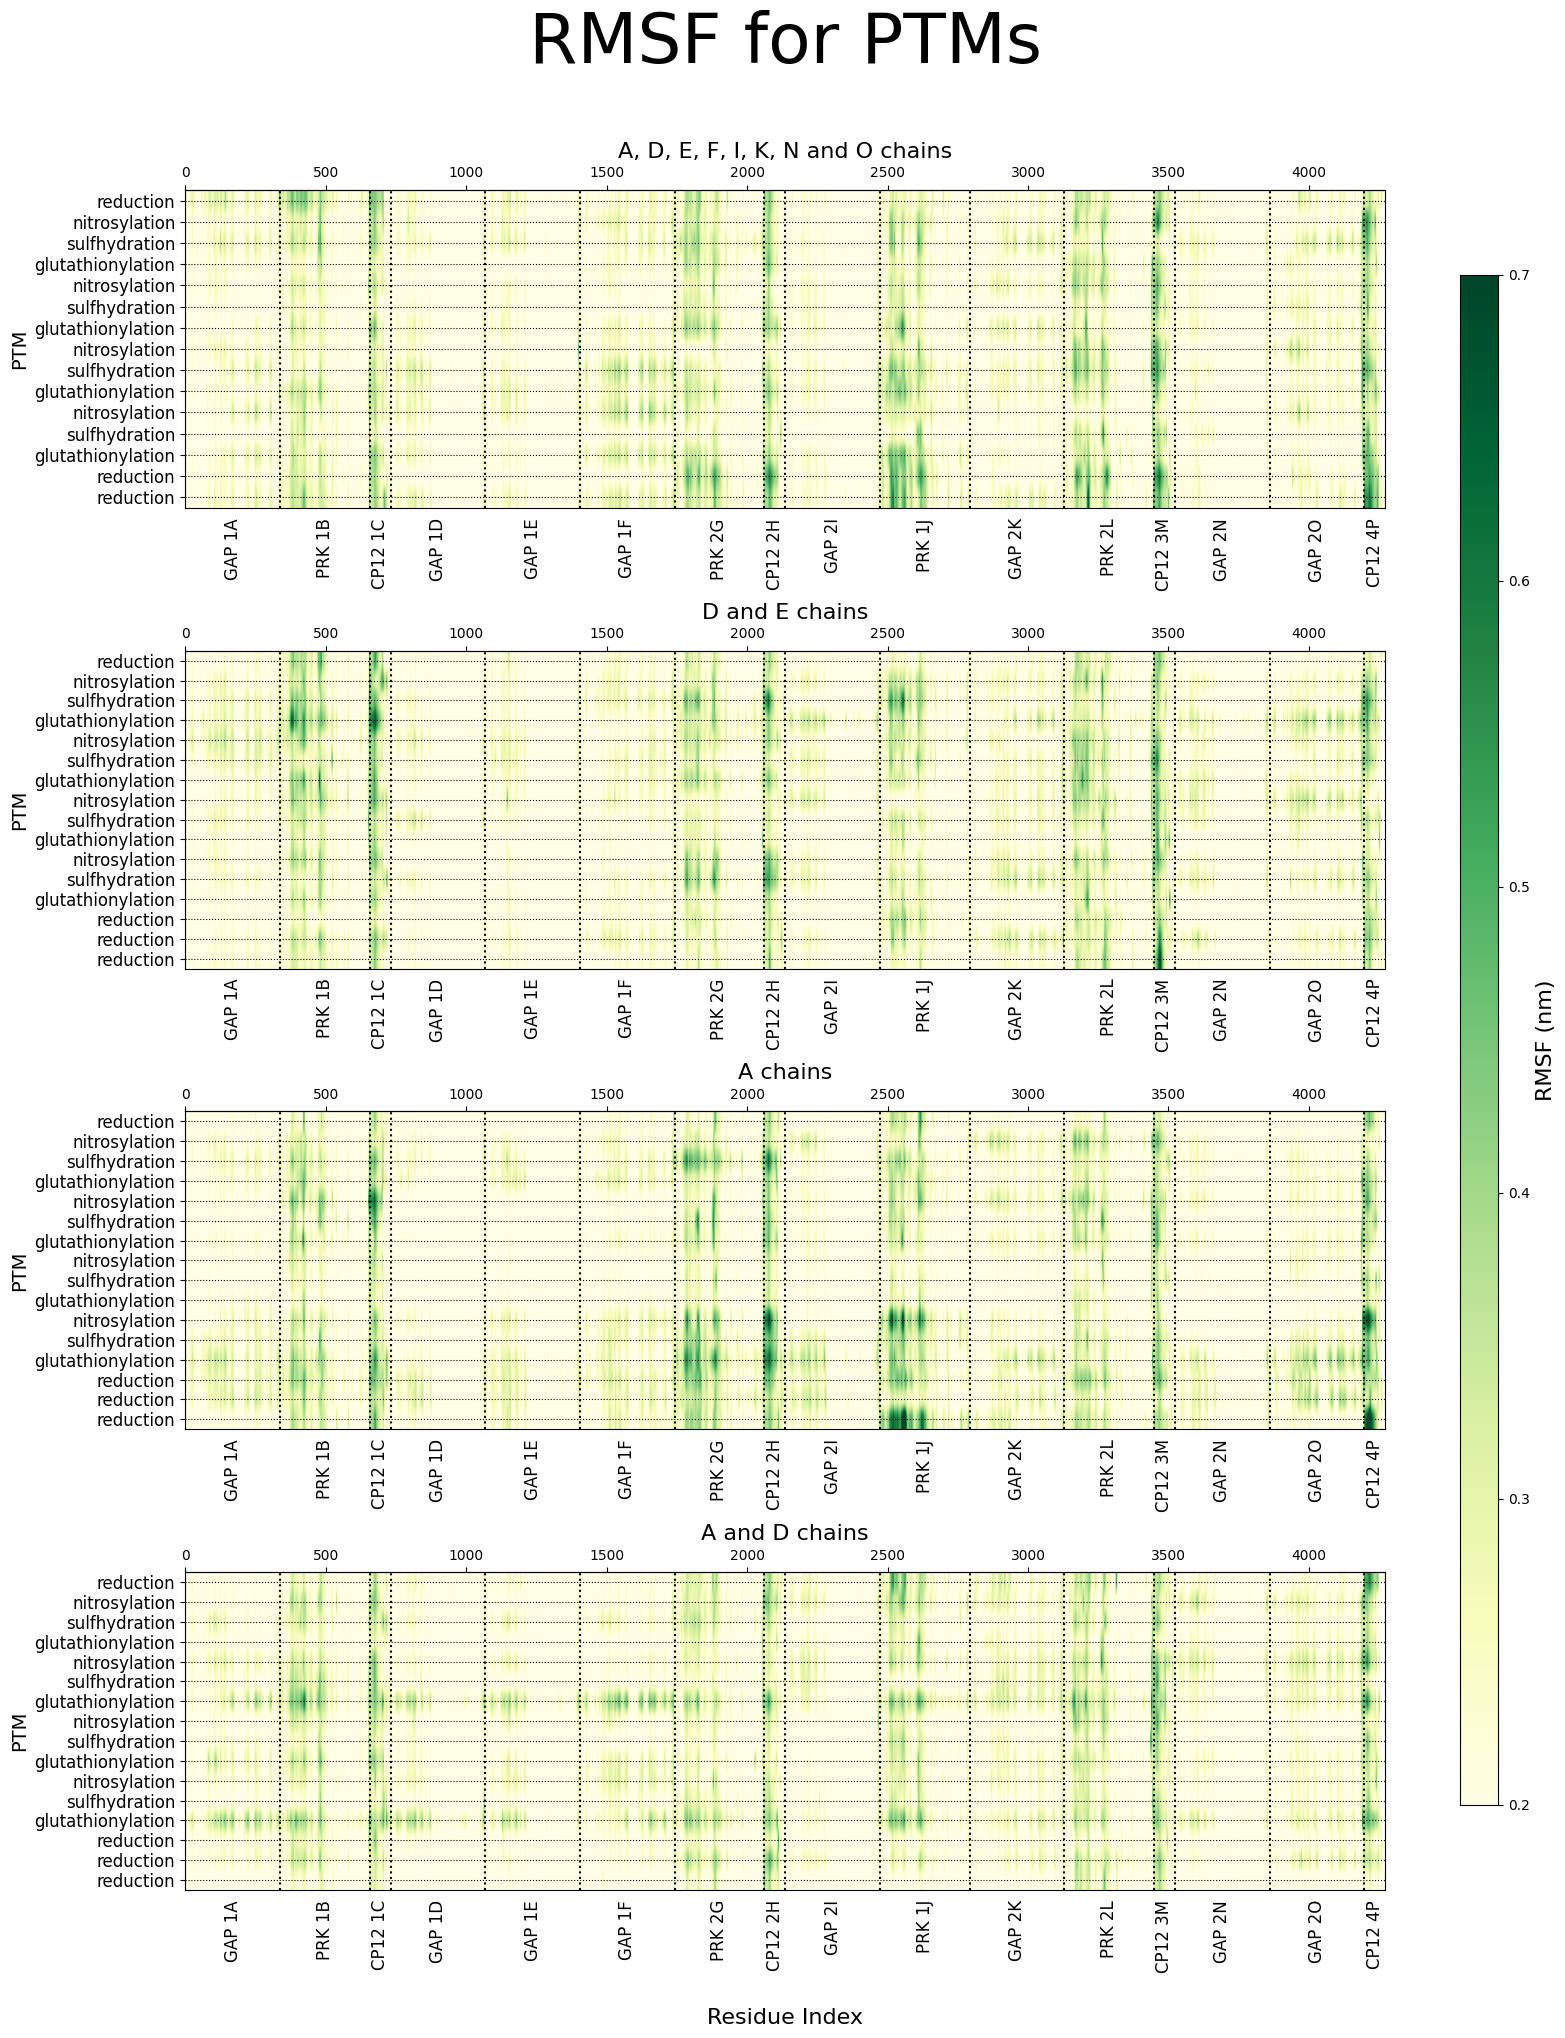

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

def extract_nad_variation(path):
    # Extract the part of the path after 'postprocess/'
    postprocess_part = path.split("/postprocess/")[1]
    # Extract the specific NAD_in_* part
    nad_variation = postprocess_part.split("/")[0]

    # Map the abbreviations to their descriptive labels
    parts = nad_variation.split('_')[2]
    if len(parts) == 1:
        return f"{parts} chains"
    elif len(parts) > 1:
        return f"{', '.join(list(parts[:-1]))} and {parts[-1]} chains"

    return nad_variation

# Initialize data storage
rmsf_data = {base_path: [] for base_path in [
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]}

# Collect data
for base_path in rmsf_data:
    for i in range(16):  # from 0000 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsf', f'{i:04d}_rmsf.xvg')
        
        if os.path.exists(file_path):
            with open(file_path, "r") as fh:
                rmsf = fh.readlines()

            # Remove header
            rmsf = rmsf[18:]

            # Actual values needed to plot
            rmsf_value = [float(line.split()[1]) for line in rmsf]

            # In case we want to keep the indices within each chain
            chain_index = [int(line.split()[0]) for line in rmsf]
            start = [i for i, e in enumerate(chain_index) if e == 1]
            end = [start[i+1] for i in range(len(start) - 1)] + [len(chain_index)]
            protein_and_chain = ["GAP 1A", "PRK 1B", "CP12 1C", "GAP 1D", "GAP 1E", "GAP 1F",
                                 "PRK 2G", "CP12 2H", "GAP 2I", "PRK 1J", "GAP 2K", "PRK 2L",
                                 "CP12 3M", "GAP 2N", "GAP 2O", "CP12 4P", "NAD 1", "NAD 2",
                                 "NAD 3", "NAD 4", "NAD 5", "NAD 6", "NAD 7", "NAD 8"]
            
            # Label format "0000"
            label = f"{i:04d}"

            # Store the collected data with corresponding label
            rmsf_data[base_path].append((label, rmsf_value, start, end, protein_and_chain))

# Plotting the heatmaps
fig, axes = plt.subplots(len(rmsf_data), 1, figsize=(20, 20), sharex=True)

for ax, (base_path, data) in zip(axes, rmsf_data.items()):
    # Determine the maximum length of the RMSF data for alignment
    max_length = max(len(values) for _, values, _, _, _ in data)

    # Initialize an array to hold the heat map data
    heatmap_data = np.full((len(data), max_length), np.nan)  # default to NaN for padding

    # Fill the heat map data array with RMSF values, pad with NaNs
    for j, (_, values, start, end, protein_and_chain) in enumerate(data):
        heatmap_data[j, :len(values)] = values

    # Plotting the heat map
    cax = ax.imshow(heatmap_data, cmap='YlGn', aspect='auto', vmin=0.2, vmax=0.7)

    # Labeling the ticks
    ytick_labels = [PTM_TYPES[label] for label, _, _, _, _ in data]
    ax.set_yticks(range(len(ytick_labels)))
    ax.set_yticklabels(ytick_labels, fontsize=12)
    
    ax2 = ax.secondary_xaxis('top') #ADD THE X-AXIS ON TOP
    
    # Adding protein and chain labels to x-axis
    for start, end, label in zip(start, end, protein_and_chain):
        ax.text((start + end) / 2, len(data), label, rotation=90, verticalalignment='top', fontsize=12, ha='center')
        ax.axvline(x=start, color='black', linestyle=':')
        #ax.xaxis.set_label_position('top')
        #ax.xaxis.tick_top()
    ax.set_xticks([])
    
    # NAD_in_* label
    nad_label = extract_nad_variation(base_path)
    ax.set_title(nad_label, fontsize=16)

    # Axis labels
    ax.set_ylabel("PTM", fontsize=14)
    #ax.grid(axis="x", color="black", linestyle=":")
    ax.grid(axis="y", color="black", linestyle=":")

# Set common labels
fig.text(0.5, 0.003, 'Residue Index', ha='center', fontsize=16)
fig.suptitle("RMSF for PTMs", y=1.01, fontsize=50)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.45, left=0.2, right=0.95, top=.92, bottom=0.07)

# Set up the color bar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.9, aspect=40)
cbar.set_label('RMSF (nm)', fontsize=16)

plt.show()
plt.savefig("RMSF.png")

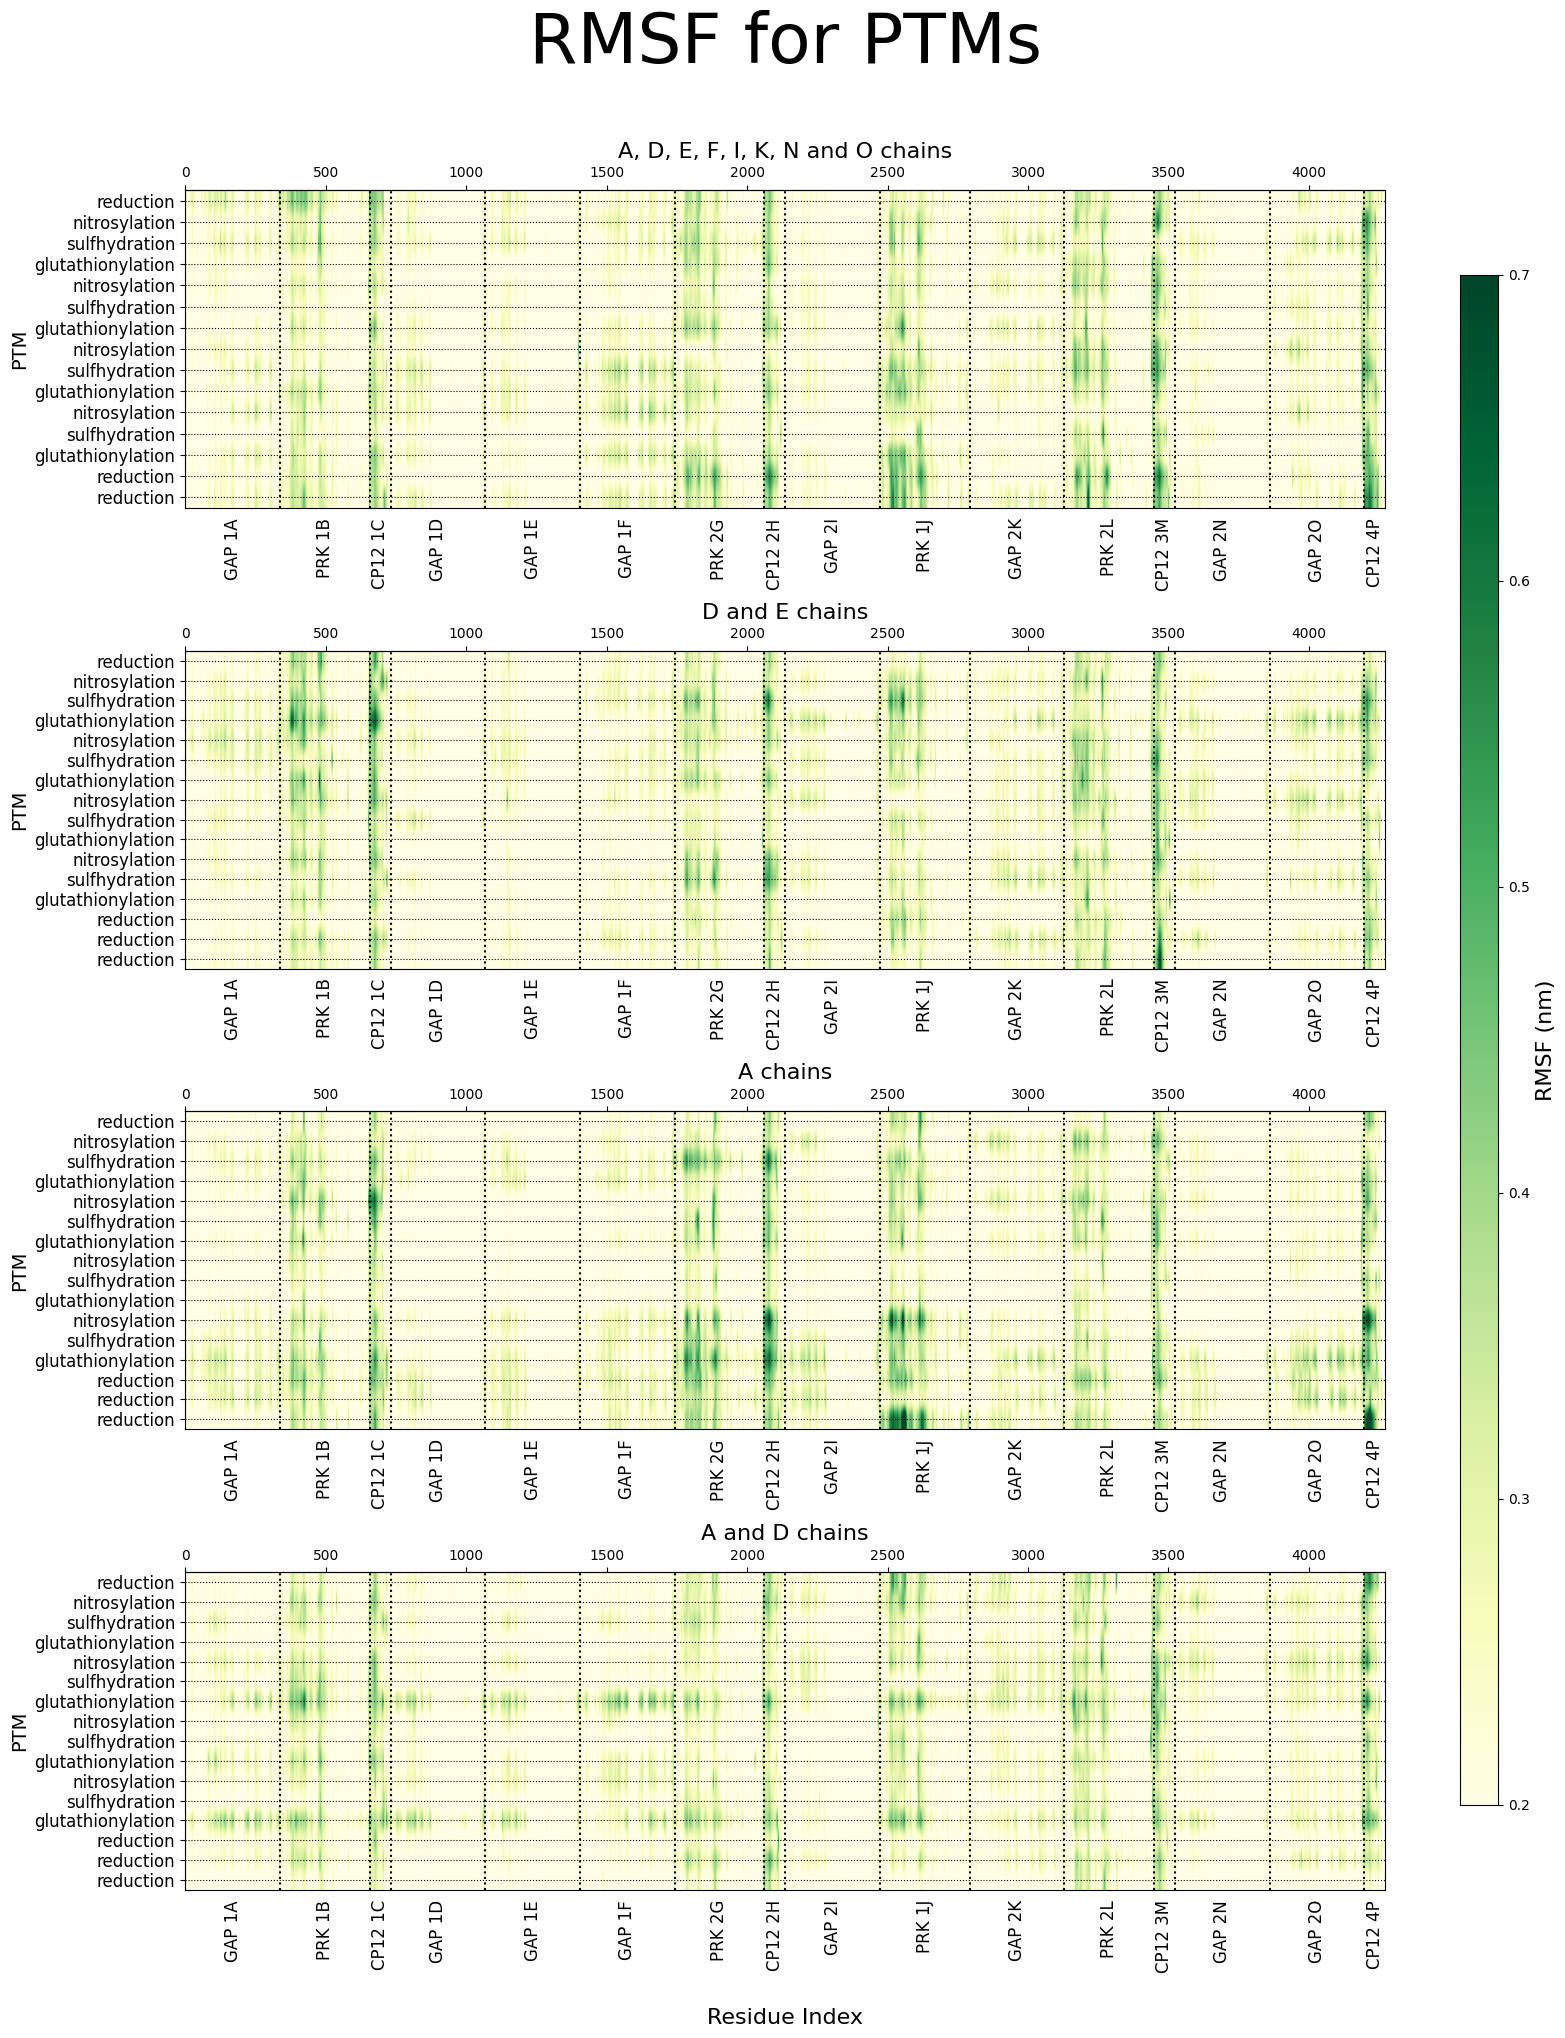

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

def extract_nad_variation(path):
    # Extract the part of the path after 'postprocess/'
    postprocess_part = path.split("/postprocess/")[1]
    # Extract the specific NAD_in_* part
    nad_variation = postprocess_part.split("/")[0]

    # Map the abbreviations to their descriptive labels
    parts = nad_variation.split('_')[2]
    if len(parts) == 1:
        return f"{parts} chains"
    elif len(parts) > 1:
        return f"{', '.join(list(parts[:-1]))} and {parts[-1]} chains"

    return nad_variation

# Initialize data storage
rmsf_data = {base_path: [] for base_path in [
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]}

# Collect data
for base_path in rmsf_data:
    for i in range(16):  # from 0000 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsf', f'{i:04d}_rmsf.xvg')
        
        if os.path.exists(file_path):
            with open(file_path, "r") as fh:
                rmsf = fh.readlines()

            # Remove header
            rmsf = rmsf[18:]

            # Actual values needed to plot
            rmsf_value = [float(line.split()[1]) for line in rmsf]

            # In case we want to keep the indices within each chain
            chain_index = [int(line.split()[0]) for line in rmsf]
            start = [i for i, e in enumerate(chain_index) if e == 1]
            end = [start[i+1] for i in range(len(start) - 1)] + [len(chain_index)]
            protein_and_chain = ["GAP 1A", "PRK 1B", "CP12 1C", "GAP 1D", "GAP 1E", "GAP 1F",
                                 "PRK 2G", "CP12 2H", "GAP 2I", "PRK 1J", "GAP 2K", "PRK 2L",
                                 "CP12 3M", "GAP 2N", "GAP 2O", "CP12 4P", "NAD 1", "NAD 2",
                                 "NAD 3", "NAD 4", "NAD 5", "NAD 6", "NAD 7", "NAD 8"]
            
            # Label format "0000"
            label = f"{i:04d}"

            # Store the collected data with corresponding label
            rmsf_data[base_path].append((label, rmsf_value, start, end, protein_and_chain))

# Plotting the heatmaps
fig, axes = plt.subplots(len(rmsf_data), 1, figsize=(20, 20), sharex=True)

for ax, (base_path, data) in zip(axes, rmsf_data.items()):
    # Determine the maximum length of the RMSF data for alignment
    max_length = max(len(values) for _, values, _, _, _ in data)

    # Initialize an array to hold the heat map data
    heatmap_data = np.full((len(data), max_length), np.nan)  # default to NaN for padding

    # Fill the heat map data array with RMSF values, pad with NaNs
    for j, (_, values, start, end, protein_and_chain) in enumerate(data):
        heatmap_data[j, :len(values)] = values

    # Plotting the heat map
    cax = ax.imshow(heatmap_data, cmap='YlGn', aspect='auto', vmin=0.2, vmax=0.7)

    # Labeling the ticks
    ytick_labels = [PTM_TYPES[label] for label, _, _, _, _ in data]
    ax.set_yticks(range(len(ytick_labels)))
    ax.set_yticklabels(ytick_labels, fontsize=12)
    
    ax2 = ax.secondary_xaxis('top') #ADD THE X-AXIS ON TOP
    
    # Adding protein and chain labels to x-axis
    for start, end, label in zip(start, end, protein_and_chain):
        ax.text((start + end) / 2, len(data), label, rotation=90, verticalalignment='top', fontsize=12, ha='center')
        ax.axvline(x=start, color='black', linestyle=':')
        #ax.xaxis.set_label_position('top')
        #ax.xaxis.tick_top()
    ax.set_xticks([])
    
    # NAD_in_* label
    nad_label = extract_nad_variation(base_path)
    ax.set_title(nad_label, fontsize=16)

    # Axis labels
    ax.set_ylabel("PTM", fontsize=14)
    #ax.grid(axis="x", color="black", linestyle=":")
    ax.grid(axis="y", color="black", linestyle=":")

# Set common labels
fig.text(0.5, 0.003, 'Residue Index', ha='center', fontsize=16)
fig.suptitle("RMSF for PTMs", y=1.01, fontsize=50)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.45, left=0.2, right=0.95, top=.92, bottom=0.07)

# Set up the color bar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.9, aspect=40)
cbar.set_label('RMSF (nm)', fontsize=16)

plt.show()
plt.savefig("RMSF.png")

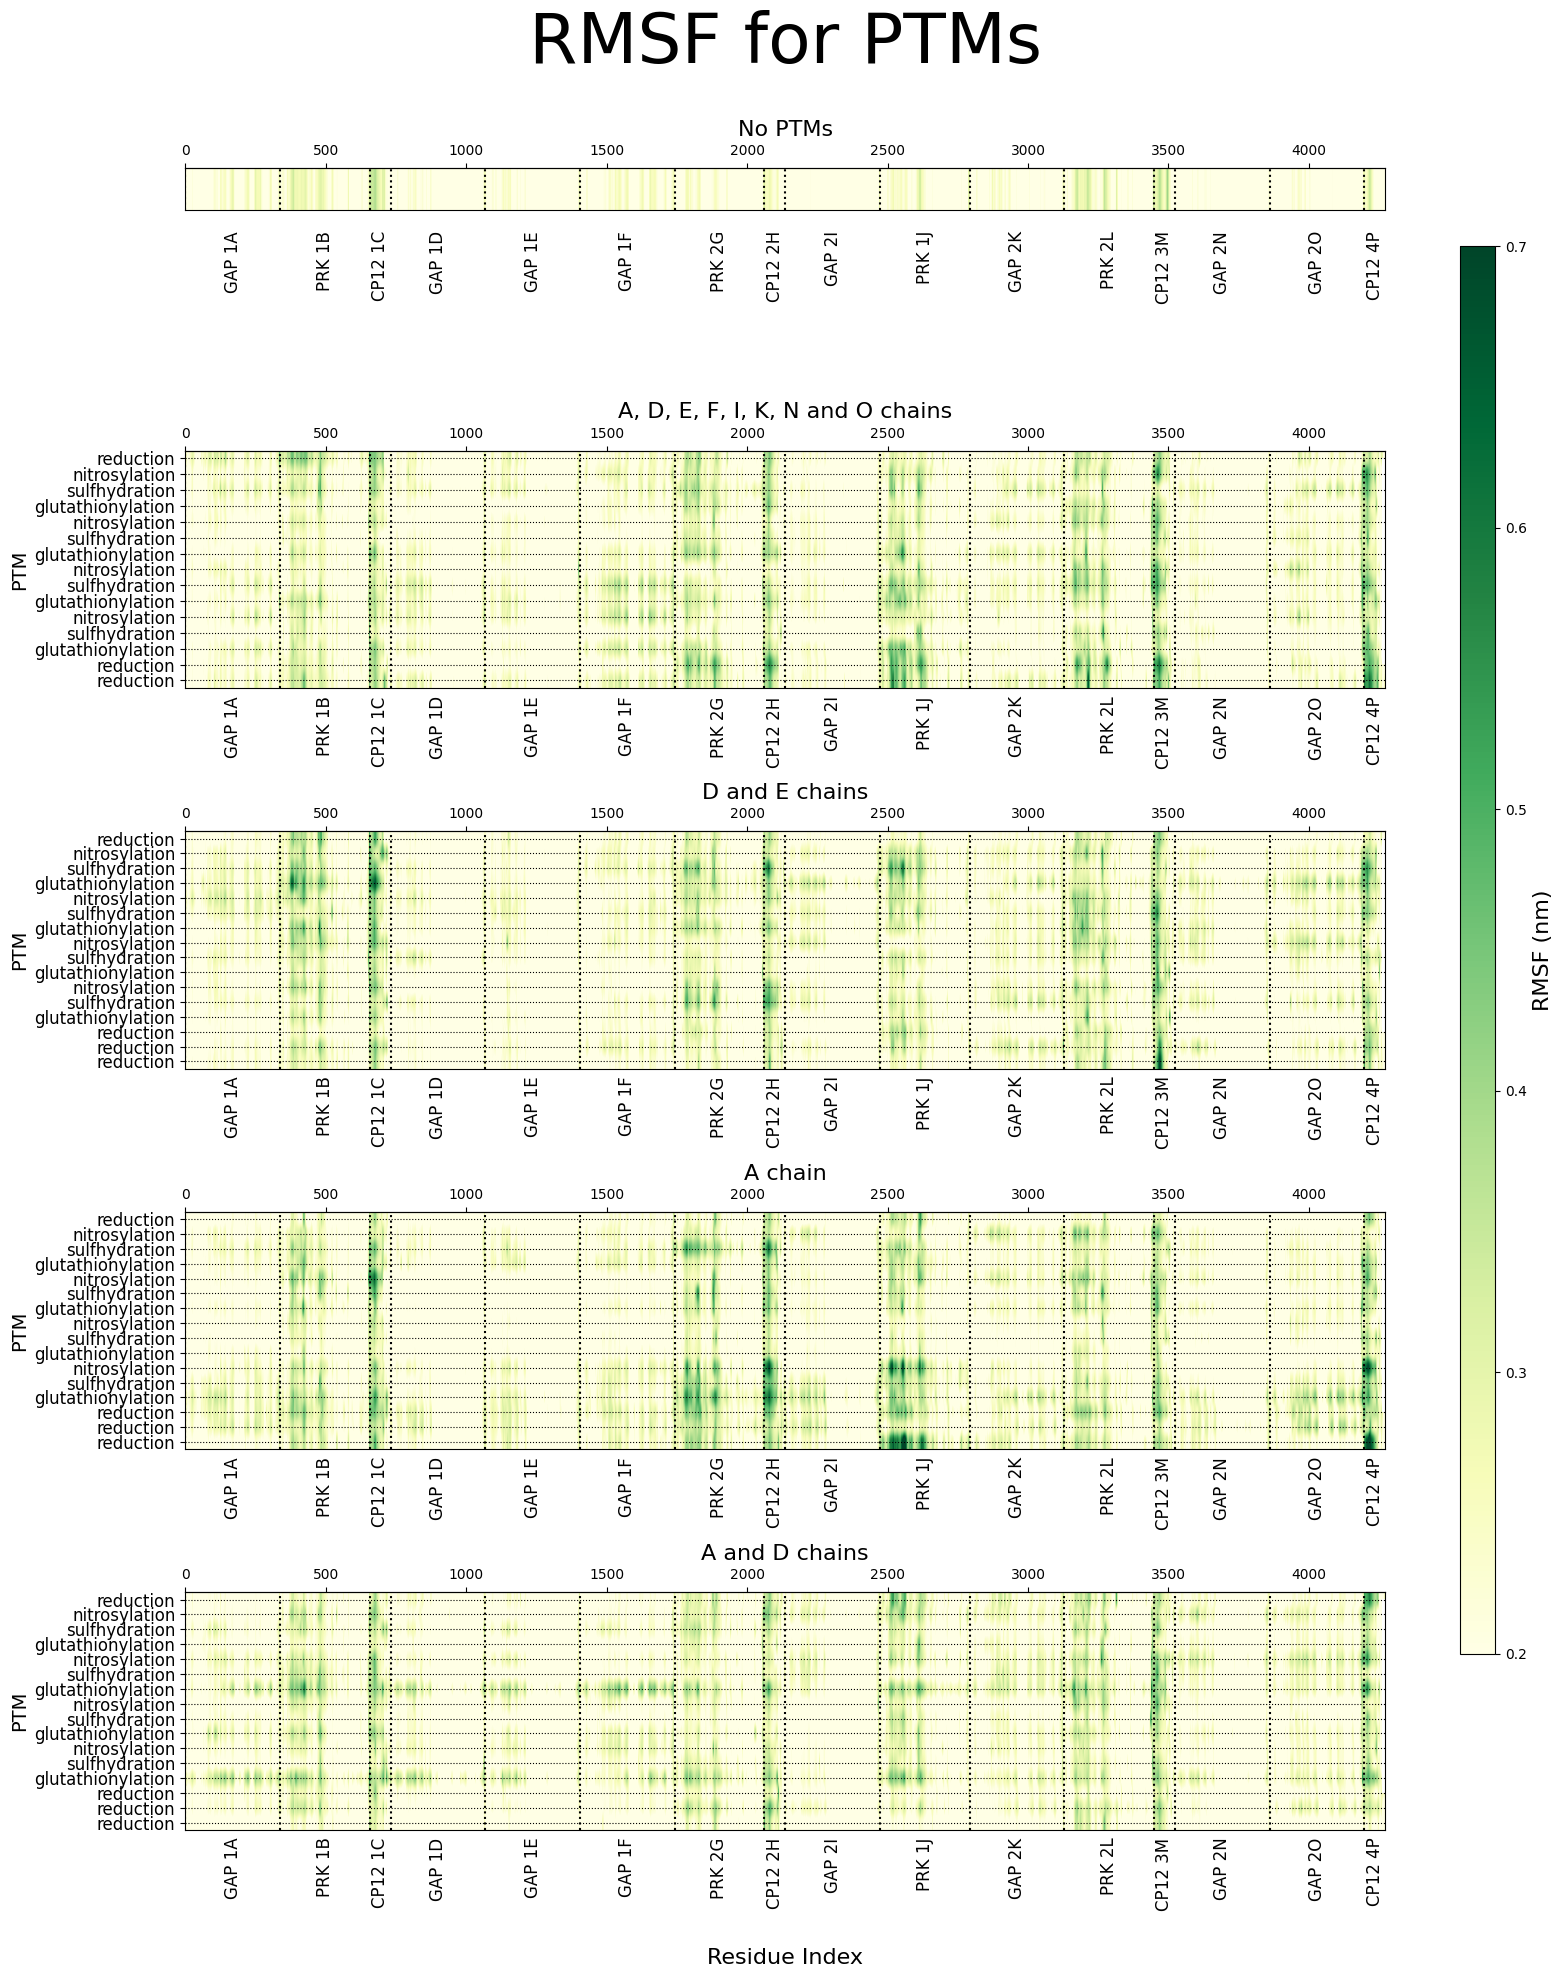

In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

def extract_nad_variation(path):
    # Extract the part of the path after 'postprocess/'
    postprocess_part = path.split("/postprocess/")[1]
    # Extract the specific NAD_in_* part
    nad_variation = postprocess_part.split("/")[0]
    
    # Check for the no_PTM condition
    if 'no_PTM' in nad_variation:
        return "No PTMs"
    
    # Map the abbreviations to their descriptive labels
    parts = nad_variation.split('_')
    if len(parts) > 2:
        chains = parts[2]
        if len(chains) == 1:
            return f"{chains} chain"
        elif len(chains) > 1:
            return f"{', '.join(list(chains[:-1]))} and {chains[-1]} chains"
    
    return nad_variation

# Initialize data storage
rmsf_data = {base_path: [] for base_path in [
    "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]}

# Collect data
for base_path in rmsf_data:
    for i in range(16):  # from 0000 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsf', f'{i:04d}_rmsf.xvg')
        
        if os.path.exists(file_path):
            with open(file_path, "r") as fh:
                rmsf = fh.readlines()

            # Remove header
            rmsf = rmsf[17:]

            # Actual values needed to plot
            rmsf_value = [float(line.split()[1]) for line in rmsf]

            # In case we want to keep the indices within each chain
            chain_index = [int(line.split()[0]) for line in rmsf]
            start = [i for i, e in enumerate(chain_index) if e == 1]
            end = [start[i+1] for i in range(len(start) - 1)] + [len(chain_index)]
            protein_and_chain = ["GAP 1A", "PRK 1B", "CP12 1C", "GAP 1D", "GAP 1E", "GAP 1F",
                                 "PRK 2G", "CP12 2H", "GAP 2I", "PRK 1J", "GAP 2K", "PRK 2L",
                                 "CP12 3M", "GAP 2N", "GAP 2O", "CP12 4P", "NAD 1", "NAD 2",
                                 "NAD 3", "NAD 4", "NAD 5", "NAD 6", "NAD 7", "NAD 8"]
            
            # Label format "0000"
            label = f"{i:04d}"

            # Store the collected data with corresponding label
            rmsf_data[base_path].append((label, rmsf_value, start, end, protein_and_chain))

# Plotting the heatmaps
fig, axes = plt.subplots(len(rmsf_data), 1, figsize=(20, 20), sharex=True)

for ax, (base_path, data) in zip(axes, rmsf_data.items()):
    # Determine the maximum length of the RMSF data for alignment
    max_length = max(len(values) for _, values, _, _, _ in data)

    # Initialize an array to hold the heat map data
    heatmap_data = np.full((len(data), max_length), np.nan)  # default to NaN for padding

    # Fill the heat map data array with RMSF values, pad with NaNs
    for j, (_, values, start, end, protein_and_chain) in enumerate(data):
        heatmap_data[j, :len(values)] = values

    # Plotting the heat map
    cax = ax.imshow(heatmap_data, cmap='YlGn', aspect='auto', vmin=0.2, vmax=0.7)
    
        
    # Labeling the ticks
    ytick_labels = [PTM_TYPES[label] for label, _, _, _, _ in data]
    ax.set_yticks(range(len(ytick_labels)))
    ax.set_yticklabels(ytick_labels, fontsize=12)
    if 'no_PTM' in base_path:
        # Adjust aspect for no_PTM to be less tall
        ax.set_aspect(150)  # Adjust this value as needed. Smaller means taller y-axis
        ax.set_yticks([])

    ax2 = ax.secondary_xaxis('top') #ADD THE X-AXIS ON TOP
    
    # Adding protein and chain labels to x-axis
    for start, end, label in zip(start, end, protein_and_chain):
        ax.text((start + end) / 2, len(data), label, rotation=90, verticalalignment='top', fontsize=12, ha='center')
        ax.axvline(x=start, color='black', linestyle=':')
        #ax.xaxis.set_label_position('top')
        #ax.xaxis.tick_top()
    ax.set_xticks([])
    
    # NAD_in_* label
    nad_label = extract_nad_variation(base_path)
    ax.set_title(nad_label, fontsize=16)

    # Axis labels
    if 'no_PTM' in base_path:
        ax.set_ylabel("", fontsize=14)
    else:
        ax.set_ylabel("PTM", fontsize=14)
    #ax.grid(axis="x", color="black", linestyle=":")
    ax.grid(axis="y", color="black", linestyle=":")

# Set common labels
fig.text(0.5, 0.003, 'Residue Index', ha='center', fontsize=16)
fig.suptitle("RMSF for PTMs", y=0.98, fontsize=50)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.6, left=0.2, right=0.95, top=.95, bottom=0.07)

# Set up the color bar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=40)
cbar.set_label('RMSF (nm)', fontsize=16)
plt.savefig("RMSF.png")
plt.show()


In [4]:
import subprocess
import sys

def install_package(package_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# List of packages to install
packages = ["jupyter", "ipywidgets"]

for package in packages:
    try:
        install_package(package)
        print(f"Successfully installed {package}")
    except subprocess.CalledProcessError as e:
        print(f"Failed to install {package}: {e}")

print("Package installation process completed.")

# Printing the mapping of residues to proteins and chains
for base_path, data_list in rmsf_data.items():
    print(f'\nBase Path: {base_path}')
    for label, rmsf_values, start, end, protein_and_chain in data_list:
        print(f'\n  PTM Type: {PTM_TYPES[label]}')
        for s_idx, e_idx, prot_chain in zip(start, end, protein_and_chain):
            residues = list(range(s_idx + 1, e_idx + 1))  # Add 1 to convert 0-based index to 1-based residue index
            if residues:
                residue_range = f'{residues[0]}-{residues[-1]}'
            else:
                residue_range = 'N/A'
            print(f'    Protein and Chain: {prot_chain} | Residue Range: {residue_range}')


Package installation process completed.

Base Path: /anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring

  PTM Type: reduction
    Protein and Chain: GAP 1A | Residue Range: 1-337
    Protein and Chain: PRK 1B | Residue Range: 338-656
    Protein and Chain: CP12 1C | Residue Range: 657-731
    Protein and Chain: GAP 1D | Residue Range: 732-1068
    Protein and Chain: GAP 1E | Residue Range: 1069-1405
    Protein and Chain: GAP 1F | Residue Range: 1406-1742
    Protein and Chain: PRK 2G | Residue Range: 1743-2061
    Protein and Chain: CP12 2H | Residue Range: 2062-2136
    Protein and Chain: GAP 2I | Residue Range: 2137-2473
    Protein and Chain: PRK 1J | Residue Range: 2474-2792
    Protein and Chain: GAP 2K | Residue Range: 2793-3129
    Protein and Chain: PRK 2L | Residue Range: 3130-3448
    Protein and Chain: CP12 3M | Residue Range: 3449-3523
    Protein and Chain: GAP 2N | Residue Range: 3524-3860
    Protein and Chain: GAP 2O | Residue Range: 3861-4197
    Protein and 

In [ ]:
import os
import concurrent.futures
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis import Universe
from MDAnalysis.analysis.pca import PCA as MDAPCA
from sklearn.cluster import KMeans
import mdaencore as encore
print("start")
# Define the base paths and filenames
base_paths = [
    "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring" #,
    #"/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    #"/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    #"/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    #"/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]
trajectory_filename = "md_whole_nojump_fit.xtc"
topology_filename = "md_Non-Water.tpr"
frame_step = 10000  # Step to use for subsampling

def compute_pca_and_clustering(base_path):
    traj_path = os.path.join(base_path, trajectory_filename)
    top_path = os.path.join(base_path, topology_filename)
    
    if not (os.path.exists(traj_path) and os.path.exists(top_path)):
        print(f"Skipping {base_path} because files are missing.")
        return None, None

    universe = Universe(top_path, traj_path)
    
    # Perform PCA on the selected frames
    print("starting PCA for ", base_path)
    pca = MDAPCA(universe, select='backbone')
    pca.run(start=0, stop=None, step=frame_step)
    print("PCA for ", base_path)
    # Project the trajectory onto the first two principal components
    pca_projection = pca.transform(universe, n_components=2, start=0, stop=None, step=frame_step)
    
    # Perform clustering on the PCA projection
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(pca_projection)
    
    return pca_projection, clusters

def plot_pca_and_clustering(pca_data, cluster_data, labels):
    plt.figure(figsize=(10, 6))

    for pca_proj, cluster, label in zip(pca_data, cluster_data, labels):
        if pca_proj is not None:
            plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c=cluster, label=label, alpha=0.5)

    if labels:
        plt.legend()

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA and Clustering of Trajectories")
    plt.grid(True)
    plt.show()

def process_subdirectories(base_path, subdirectory_indices):
    pca_data = []
    cluster_data = []
    labels = []
    for i in subdirectory_indices:
        sub_path = os.path.join(base_path, f"00{i:02}")
        label = os.path.basename(base_path) + f"/00{i:02}"
        try:
            pca_proj, clusters = compute_pca_and_clustering(sub_path)
            if pca_proj is not None:
                pca_data.append(pca_proj)
                cluster_data.append(clusters)
                labels.append(label)
        except Exception as e:
            print(f"Error processing {label}: {e}")
    return pca_data, cluster_data, labels

# Group tasks for parallel execution
tasks = []
for base_path in base_paths:
    tasks.append((base_path, list(range(16))))

# Use concurrent.futures for parallel execution
pca_data = []
cluster_data = []
labels = []

with concurrent.futures.ProcessPoolExecutor(max_workers=120) as executor:
    futures = [executor.submit(process_subdirectories, base_path, subdirectory_indices) for base_path, subdirectory_indices in tasks]
    
    for future in concurrent.futures.as_completed(futures):
        try:
            pca_result, cluster_result, label_result = future.result()
            pca_data.extend(pca_result)
            cluster_data.extend(cluster_result)
            labels.extend(label_result)
        except Exception as e:
            print(f"Error in parallel execution: {e}")

# Plot the PCA and clustering results
plot_pca_and_clustering(pca_data, cluster_data, labels)


Starting PCA for randomstring/0000
Starting PCA for 1280ec92-875e-450d-966b-4550ebedc82e/0000
Starting PCA for 6800f629-7cb9-4526-9f85-0c19eab37653/0000
Starting PCA for 563e2df5-82de-4918-967d-70e733cfa584/0000
Coordinate selection done for randomstring/0000
Coordinate selection done for 1280ec92-875e-450d-966b-4550ebedc82e/0000
Starting PCA for eda6b09c-b9f2-42c9-be15-0204ed29807a/0000
PCA done for randomstring/0000
PCA done for 1280ec92-875e-450d-966b-4550ebedc82e/0000
Coordinate selection done for 6800f629-7cb9-4526-9f85-0c19eab37653/0000
Coordinate selection done for 563e2df5-82de-4918-967d-70e733cfa584/0000
PCA done for 6800f629-7cb9-4526-9f85-0c19eab37653/0000
Coordinate selection done for eda6b09c-b9f2-42c9-be15-0204ed29807a/0000
PCA done for 563e2df5-82de-4918-967d-70e733cfa584/0000
PCA done for eda6b09c-b9f2-42c9-be15-0204ed29807a/0000
Clustering done for randomstring/0000
Results saved for randomstring_0000_0000 in /anfhome/shared/qipd/newmds/postprocess/PCA_a
Skipping /anfh

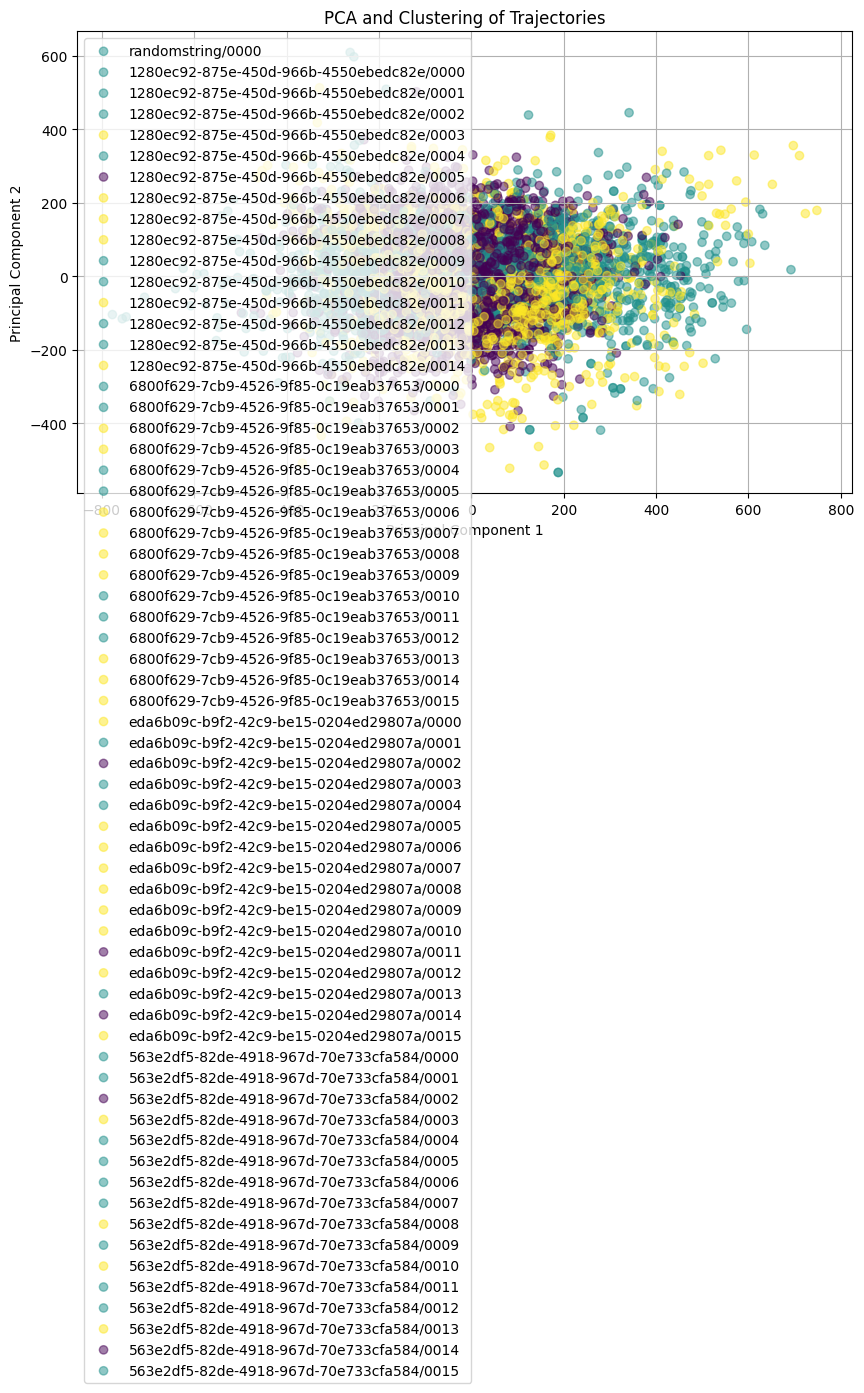

In [5]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from MDAnalysis import Universe
import concurrent.futures
import multiprocessing

# File paths and parameters
trajectory_filename = "md_whole_nojump_fit.xtc"
topology_filename = "md_Non-Water.tpr"
frame_step = 100  # Step to use for subsampling
output_dir = "/anfhome/shared/qipd/newmds/postprocess/PCA_a"
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

def compute_pca_and_clustering(base_path, label):
    """
    Compute PCA and clustering for a given trajectory and topology.
    """
    traj_path = os.path.join(base_path, trajectory_filename)
    top_path = os.path.join(base_path, topology_filename)

    if not (os.path.exists(traj_path) and os.path.exists(top_path)):
        print(f"Skipping {base_path} because files are missing.")
        return None, None

    universe = Universe(top_path, traj_path)

    # Select backbone atoms
    backbone = universe.select_atoms("backbone")
    if backbone.n_atoms == 0:
        print(f"No backbone atoms found for {label}. Skipping.")
        return None, None

    # Extract positions over frames
    print(f"Starting PCA for {label}")
    selected_coordinates = []
    for ts in universe.trajectory[::frame_step]:
        selected_coordinates.append(backbone.positions)
    selected_coordinates = np.array(selected_coordinates)  # Shape: (n_frames, n_atoms, 3)
    print(f"Coordinate selection done for {label}")

    # Check if there are enough frames for clustering
    n_frames, n_atoms, n_coords = selected_coordinates.shape
    if n_frames < 3:
        print(f"Skipping {label}: Only {n_frames} frames available after subsampling.")
        return None, None

    # Flatten coordinates for PCA (n_frames, n_atoms * 3)
    flattened_coordinates = selected_coordinates.reshape(n_frames, n_atoms * n_coords)

    # Perform PCA using scikit-learn
    pca = PCA(n_components=2)
    pca_projection = pca.fit_transform(flattened_coordinates)
    print(f"PCA done for {label}")

    # Perform clustering using MiniBatchKMeans
    n_clusters = min(3, n_frames)  # Ensure n_clusters does not exceed n_frames
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, random_state=42)
    clusters = kmeans.fit_predict(pca_projection)
    print(f"Clustering done for {label}")

    # Construct descriptive file names
    parent_dir = os.path.basename(os.path.dirname(base_path))
    sub_dir = os.path.basename(base_path)
    descriptive_label = f"{parent_dir}_{sub_dir}_{label.split('/')[-1]}"

    # Save results to files
    os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists
    np.save(os.path.join(output_dir, f"{descriptive_label}_pca.npy"), pca_projection)
    np.save(os.path.join(output_dir, f"{descriptive_label}_clusters.npy"), clusters)
    print(f"Results saved for {descriptive_label} in {output_dir}")

    return pca_projection, clusters


def process_subdirectories(base_path, subdirectory_indices):
    """
    Process subdirectories and compute PCA and clustering.
    """
    pca_data = []
    cluster_data = []
    labels = []
    metadata = []  # To store metadata for saving later

    for i in subdirectory_indices:
        sub_path = os.path.join(base_path, f"00{i:02}")
        label = os.path.basename(base_path) + f"/00{i:02}"
        try:
            pca_proj, clusters = compute_pca_and_clustering(sub_path, label)
            if pca_proj is not None:
                pca_data.append(pca_proj)
                cluster_data.append(clusters)
                labels.append(label)

                # Save metadata
                metadata.append({"label": label, "path": sub_path})
        except Exception as e:
            print(f"Error processing {label}: {e}")

    # Save metadata to JSON
    metadata_file = os.path.join(output_dir, f"{os.path.basename(base_path)}_metadata.json")
    with open(metadata_file, "w") as f:
        json.dump(metadata, f, indent=4)
    
    return pca_data, cluster_data, labels

def plot_pca_and_clustering(pca_data, cluster_data, labels):
    """
    Plot PCA and clustering results.
    """
    plt.figure(figsize=(10, 6))

    for pca_proj, cluster, label in zip(pca_data, cluster_data, labels):
        if pca_proj is not None:
            plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c=cluster, label=label, alpha=0.5)

    if labels:
        plt.legend()

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA and Clustering of Trajectories")
    plt.grid(True)
    plt.show()

# Define the base paths and tasks
base_paths = [
    "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]
tasks = [(base_path, list(range(16))) for base_path in base_paths]

# Determine optimal workers based on CPU count
max_workers = min(16, multiprocessing.cpu_count() // 2)

# Parallel execution
pca_data = []
cluster_data = []
labels = []

with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(process_subdirectories, base_path, subdirectory_indices) for base_path, subdirectory_indices in tasks]

    for future in concurrent.futures.as_completed(futures):
        try:
            pca_result, cluster_result, label_result = future.result()
            pca_data.extend(pca_result)
            cluster_data.extend(cluster_result)
            labels.extend(label_result)
        except Exception as e:
            print(f"Error in parallel execution: {e}")

# Save labels to a JSON file
labels_file = os.path.join(output_dir, "labels.json")
with open(labels_file, "w") as f:
    json.dump(labels, f, indent=4)

# Plot the PCA and clustering results
plot_pca_and_clustering(pca_data, cluster_data, labels)


/tmp/ipykernel_31234/740651810.py:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color, marker=marker, alpha=0.5, label=f"{ptm_type}, {nad_group}")


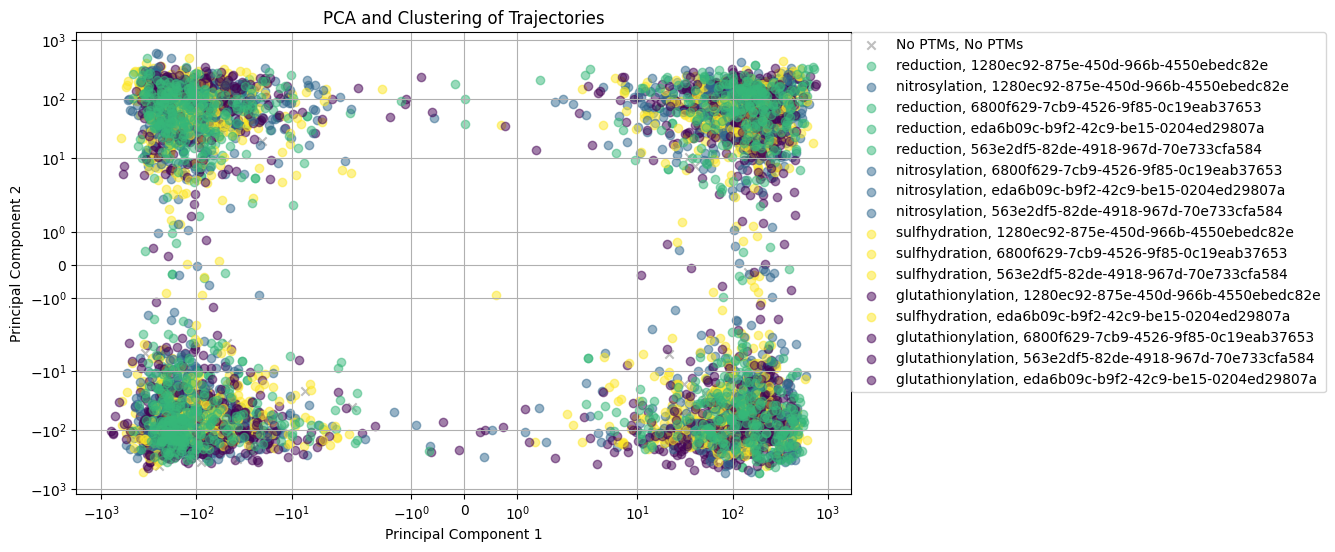

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the directory where the data is saved
output_dir = "/anfhome/shared/qipd/newmds/postprocess/PCA_a"

# Define the PTM_TYPES mapping
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

# Define color map for PTM types using viridis
ptm_types = list(PTM_TYPES.values())
unique_ptm_types = sorted(set(ptm_types))
color_map = plt.cm.viridis(np.linspace(0, 1, len(unique_ptm_types)))

ptm_colors = {ptm_type: color for ptm_type, color in zip(unique_ptm_types, color_map)}

nad_markers = {
    "NAD_in_ADEFIKNO": 'o',
    "NAD_in_DE": 's',
    "NAD_in_A": 'D',
    "NAD_in_AD": '^',
    "No PTMs": 'x'
}

# Function to determine PTM type and NAD group from the filename
def extract_information_from_filename(filename):
    if "randomstring" in filename:
        return "No PTMs", "No PTMs"
    parts = filename.split('_')
    # Example logic based on the listed files
    ptm_index = parts[2]  # Index of code, e.g., 0000, 0001, etc.
    ptm_type = PTM_TYPES.get(ptm_index, "Unknown")
    nad_group = parts[0]  # Base name like 1280ec92
    return ptm_type, nad_group

def plot_saved_pca_and_clustering():
    """Load and plot PCA and clustering results from the saved data."""
    
    # Gather all PCA and cluster files
    all_files = os.listdir(output_dir)
    pca_files = [f for f in all_files if 'pca.npy' in f]
    cluster_files = [f for f in all_files if 'clusters.npy' in f]
    
    plt.figure(figsize=(10, 6))

    for pca_file in pca_files:
        # Derive corresponding cluster file
        prefix = pca_file[:-8]  # Remove "_pca.npy"
        cluster_file = f"{prefix}_clusters.npy"
        
        if cluster_file in cluster_files:
            pca_data = np.load(os.path.join(output_dir, pca_file))
            cluster_data = np.load(os.path.join(output_dir, cluster_file))
            
            # Extract PTM type and NAD group
            ptm_type, nad_group = extract_information_from_filename(pca_file)
            
            # Determine color and marker
            color = ptm_colors.get(ptm_type, "grey")
            marker = nad_markers.get(nad_group, 'o')

            # Plot
            plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color, marker=marker, alpha=0.5, label=f"{ptm_type}, {nad_group}")

    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys())
    plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA and Clustering of Trajectories")
    plt.grid(True)
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.show()

# Call the plot function
plot_saved_pca_and_clustering()

/tmp/ipykernel_31234/1331503491.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('viridis', len(unique_ptm_types))
/tmp/ipykernel_31234/1331503491.py:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color, marker=marker, alpha=0.5, label=f"{ptm_type}, {nad_type}")


randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
randomstring
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_ADEFIKNO
NAD_in_A

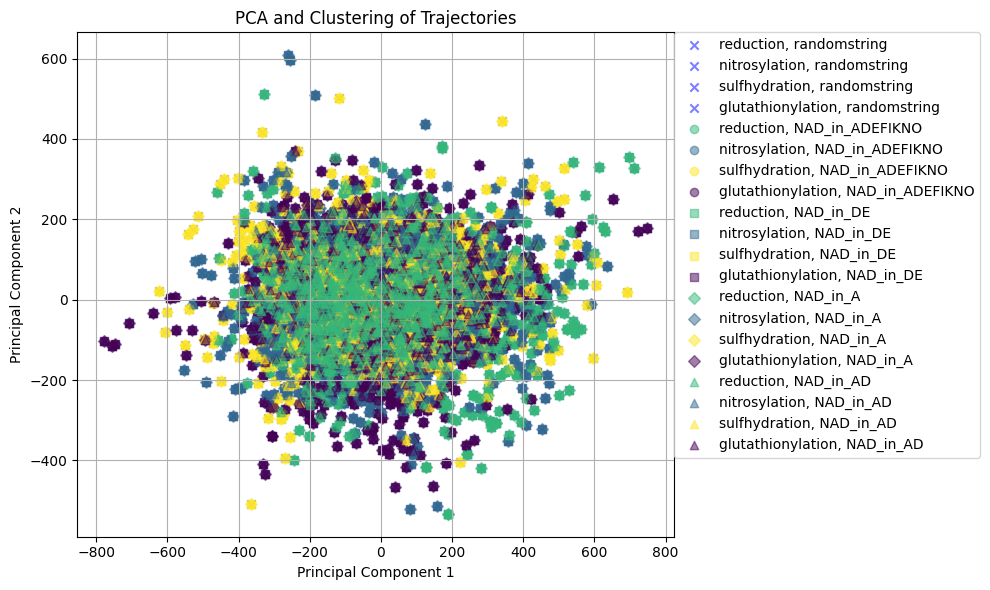

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the directory where the data is saved
output_dir = "/anfhome/shared/qipd/newmds/postprocess/PCA_a"

# Define the PTM_TYPES mapping
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

# Define color map for PTM types using viridis
ptm_types = list(PTM_TYPES.values())
unique_ptm_types = sorted(set(ptm_types))
color_map = cm.get_cmap('viridis', len(unique_ptm_types))

ptm_colors = {ptm_type: color_map(i) for i, ptm_type in enumerate(unique_ptm_types)}

# Define markers for NAD groups
nad_markers = {
    "NAD_in_ADEFIKNO": 'o',
    "NAD_in_DE": 's',
    "NAD_in_A": 'D',
    "NAD_in_AD": '^',
    "randomstring": 'x'
}

def extract_nad_type(path):
    """Extract the NAD type from the given file path."""
    parts = path.split('/')
    for part in parts:
        if part.startswith("NAD_in_"):
            return part
    return "randomstring"  # Default if no NAD type is found, assuming "randomstring" for the marker

def plot_saved_pca_and_clustering(base_paths):
    """Load and plot PCA and clustering results from the saved data."""
    
    plt.figure(figsize=(10, 6))

    for base_path in base_paths:
        # Extract NAD type from base path
        nad_type = extract_nad_type(base_path)
        
        # List all relevant PCA and cluster files
        pca_files = [f for f in os.listdir(output_dir) if 'pca.npy' in f]
        cluster_files = [f for f in os.listdir(output_dir) if 'clusters.npy' in f]
        
        for pca_file in pca_files:
            # Derive corresponding cluster file
            prefix = pca_file[:-8]  # Remove "_pca.npy"
            cluster_file = f"{prefix}_clusters.npy"
            
            if cluster_file in cluster_files:
                pca_data = np.load(os.path.join(output_dir, pca_file))
                cluster_data = np.load(os.path.join(output_dir, cluster_file))
                
                # Extract PTM type from filename
                ptm_index = pca_file.split('_')[2]  # Assuming part '0000', '0001', etc.
                ptm_type = PTM_TYPES.get(ptm_index, "Unknown")
                
                # Determine color and marker
                color = ptm_colors.get(ptm_type, "grey")
                marker = nad_markers.get(nad_type, 'o')  # Fallback to 'o' if not found
        
                # Assign label
                print(nad_type)
                if nad_type == "randomstring":
                    label = "No PTM"
                    color = "blue"
                else:
                    label = f"{ptm_type}, {nad_type}"


                # Plot
                plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color, marker=marker, alpha=0.5, label=f"{ptm_type}, {nad_type}")

    # Add legend outside the plot
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA and Clustering of Trajectories")
    plt.grid(True)
    plt.tight_layout()
    #plt.xscale('symlog')
    #plt.yscale('symlog')
    plt.show()

# Base paths for NAD types inference
base_paths = [
    "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
    "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
]

# Call the plot function
plot_saved_pca_and_clustering(base_paths)